In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [63]:
data = pd.read_csv('diabetes.csv')

In [64]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [67]:
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [68]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [69]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [70]:
np.unique(data.Outcome, return_counts=True)

(array([0, 1], dtype=int64), array([500, 268], dtype=int64))

In [71]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

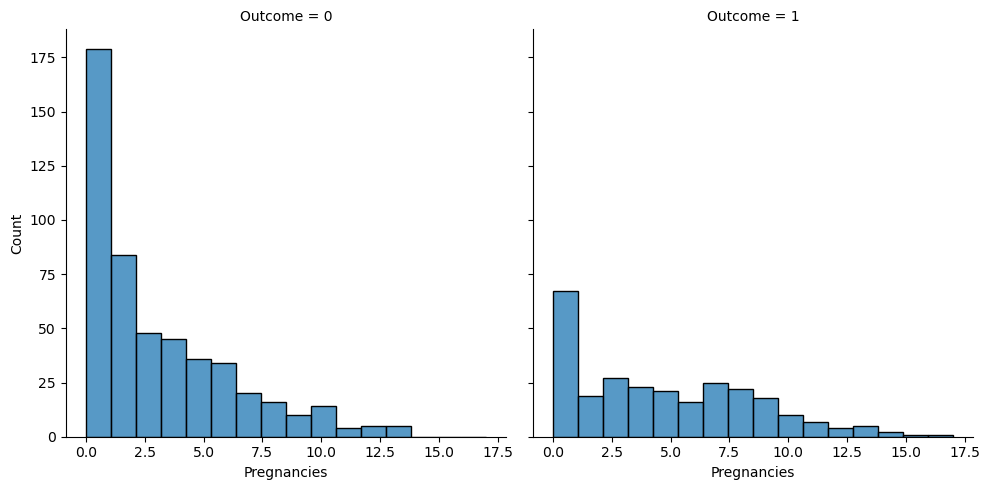

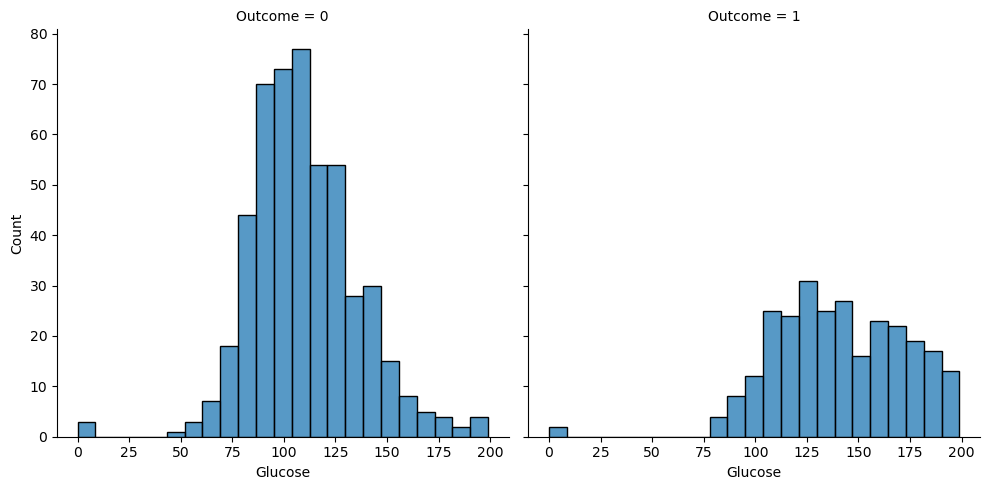

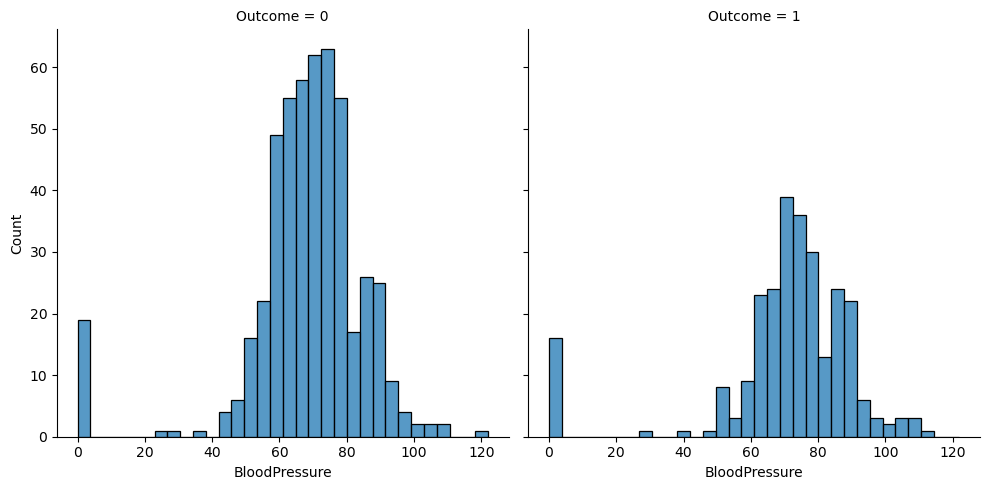

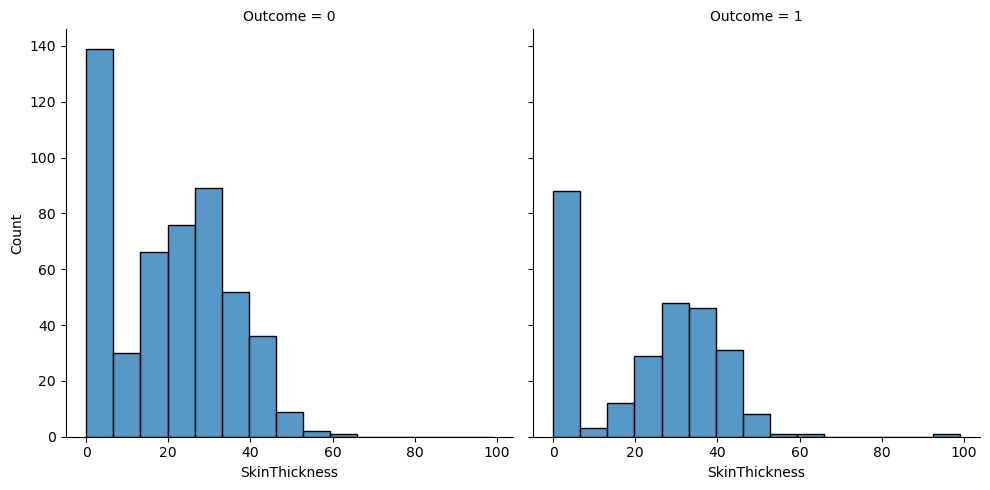

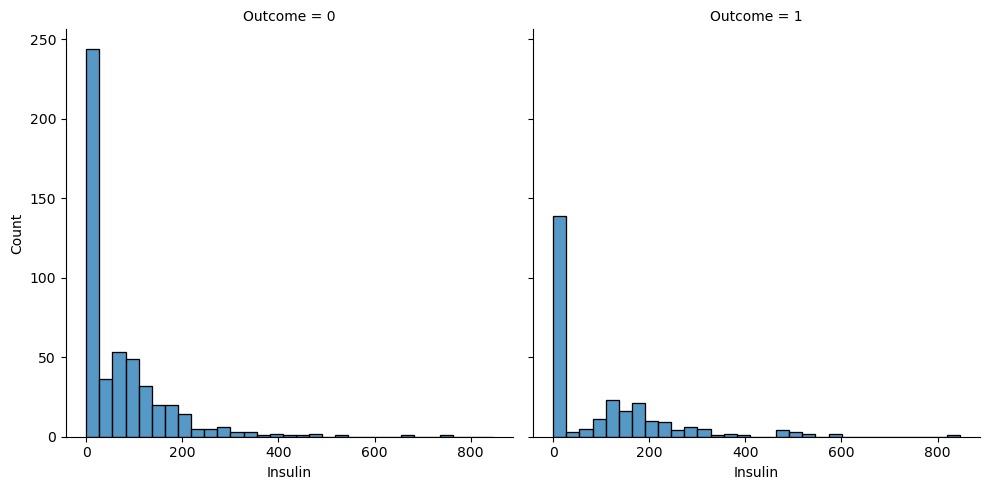

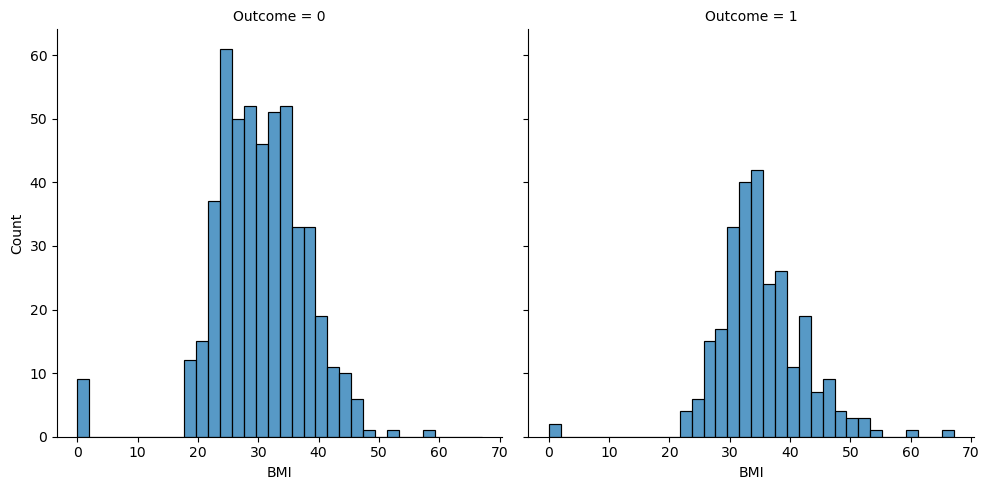

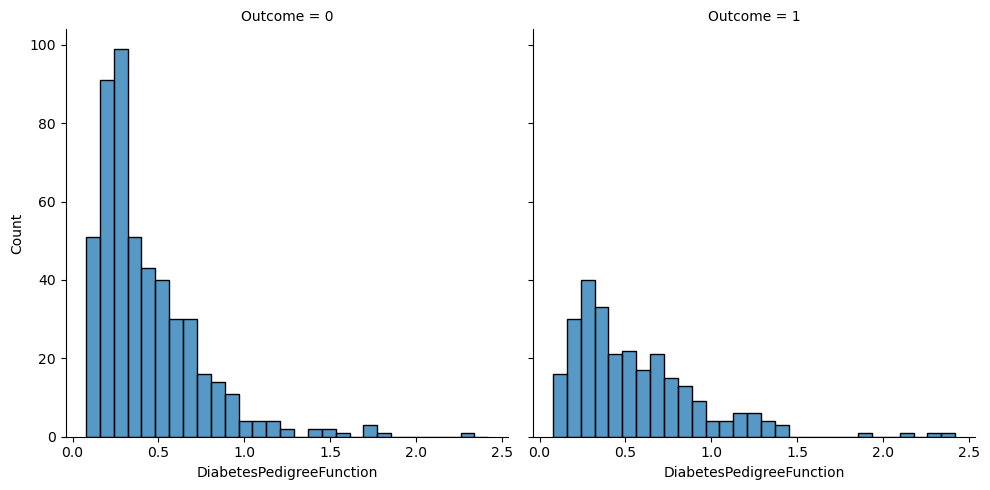

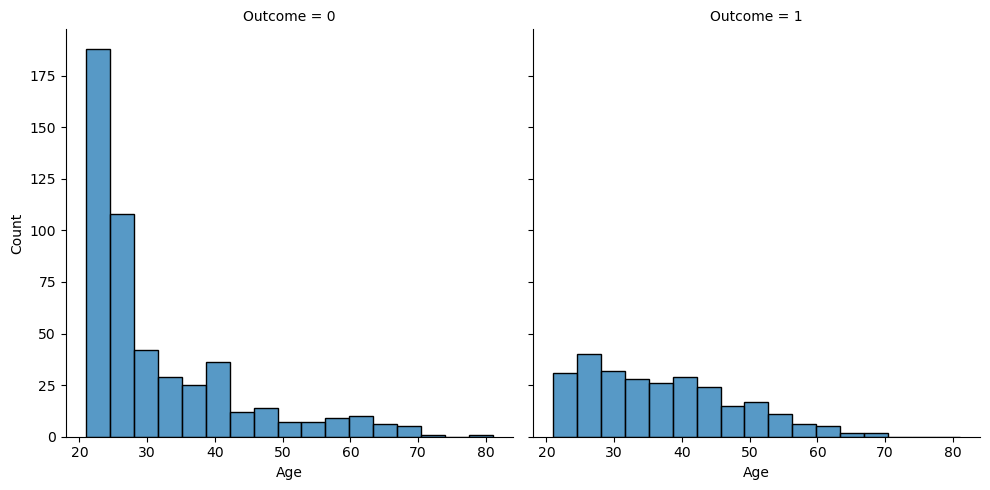

In [72]:
for col in data.columns[:-1]:
    sns.displot(data=data, x=col, col=data.Outcome)
    plt.show

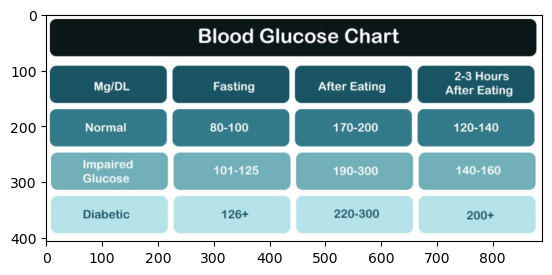

<Axes: >

In [73]:
import rasterio
from rasterio.plot import show
img = rasterio.open('glucose level chart.jpg')
show(img)

<Axes: >

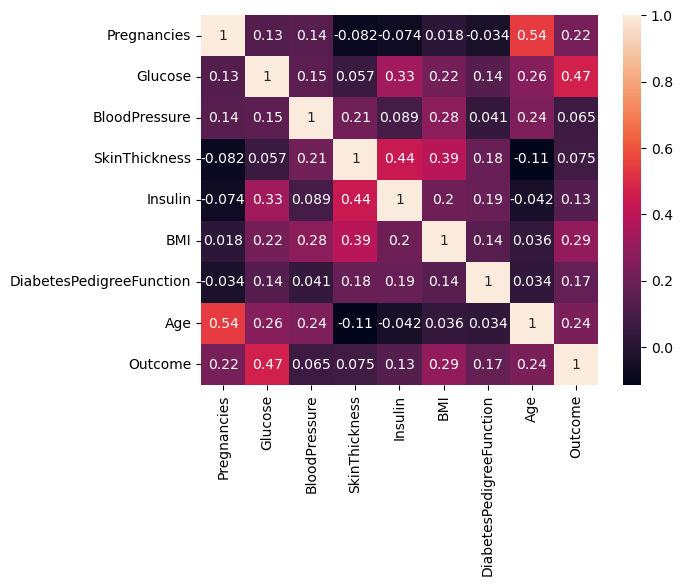

In [74]:
sns.heatmap(data.corr(), annot=True)

In [75]:
data[data['SkinThickness']>80]
data.drop(index=579, axis=0, inplace=True)

In [76]:
SkinThickness_zero1 = data.query('SkinThickness == 0 and Outcome == 1')
SkinThickness_zero1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
9,8,125,96,0,0,0.0,0.232,54,1
11,10,168,74,0,0,38.0,0.537,34,1
15,7,100,0,0,0,30.0,0.484,32,1
17,7,107,74,0,0,29.6,0.254,31,1
...,...,...,...,...,...,...,...,...,...
749,6,162,62,0,0,24.3,0.178,50,1
750,4,136,70,0,0,31.2,1.182,22,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1


In [77]:
SkinThickness_zero0 = data.query('SkinThickness == 0 and Outcome == 0')
SkinThickness_zero0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
12,10,139,80,0,0,27.1,1.441,57,0
21,8,99,84,0,0,35.4,0.388,50,0
...,...,...,...,...,...,...,...,...,...
728,2,175,88,0,0,22.9,0.326,22,0
729,2,92,52,0,0,30.1,0.141,22,0
734,2,105,75,0,0,23.3,0.560,53,0
758,1,106,76,0,0,37.5,0.197,26,0


In [78]:
data2 = data.query('SkinThickness != 0 and Glucose != 0 and BloodPressure != 0 and BMI != 0')

<Axes: >

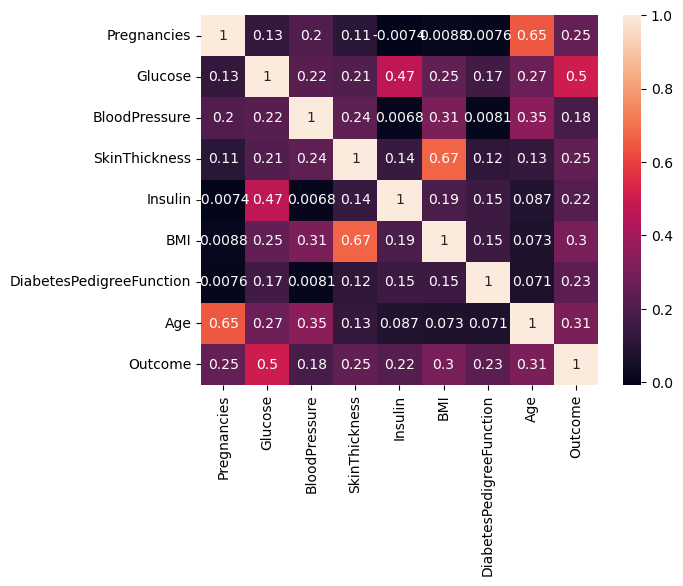

In [79]:
sns.heatmap(data2.corr(), annot=True)

In [80]:
df1 = data2.query('Outcome == 1')
df2 = data2.query('Outcome == 0')

In [81]:
df1.mean()

Pregnancies                   4.715909
Glucose                     142.812500
BloodPressure                74.727273
SkinThickness                32.602273
Insulin                     152.784091
BMI                          35.826136
DiabetesPedigreeFunction      0.616824
Age                          36.267045
Outcome                       1.000000
dtype: float64

In [82]:
df2.mean()

Pregnancies                   2.926761
Glucose                     110.016901
BloodPressure                69.912676
SkinThickness                27.290141
Insulin                      96.574648
BMI                          31.429577
DiabetesPedigreeFunction      0.446315
Age                          29.222535
Outcome                       0.000000
dtype: float64

In [83]:
SkinThickness_zero1 = SkinThickness_zero1.replace({'SkinThickness': {0:32.6}, 'Insulin': {0:152.78}, 'BMI': {0:35.83}, 'BloodPressure':{0:74.72}})
SkinThickness_zero1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64.00,32.6,152.78,23.30,0.672,32,1
9,8,125,96.00,32.6,152.78,35.83,0.232,54,1
11,10,168,74.00,32.6,152.78,38.00,0.537,34,1
15,7,100,74.72,32.6,152.78,30.00,0.484,32,1
17,7,107,74.00,32.6,152.78,29.60,0.254,31,1
...,...,...,...,...,...,...,...,...,...
749,6,162,62.00,32.6,152.78,24.30,0.178,50,1
750,4,136,70.00,32.6,152.78,31.20,1.182,22,1
757,0,123,72.00,32.6,152.78,36.30,0.258,52,1
759,6,190,92.00,32.6,152.78,35.50,0.278,66,1


In [84]:
SkinThickness_zero0 = SkinThickness_zero0.replace({'SkinThickness': {0:27.29}, 'Insulin': {0:96.57}, 'BMI': {0:31.43}, 'BloodPressure':{0:69.91}})
SkinThickness_zero0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,5,116,74.00,27.29,96.57,25.6,0.201,30,0
7,10,115,69.91,27.29,96.57,35.3,0.134,29,0
10,4,110,92.00,27.29,96.57,37.6,0.191,30,0
12,10,139,80.00,27.29,96.57,27.1,1.441,57,0
21,8,99,84.00,27.29,96.57,35.4,0.388,50,0
...,...,...,...,...,...,...,...,...,...
728,2,175,88.00,27.29,96.57,22.9,0.326,22,0
729,2,92,52.00,27.29,96.57,30.1,0.141,22,0
734,2,105,75.00,27.29,96.57,23.3,0.560,53,0
758,1,106,76.00,27.29,96.57,37.5,0.197,26,0


In [85]:
new_data = pd.concat([SkinThickness_zero0, SkinThickness_zero1, data2])

In [86]:
new_data = new_data.reset_index(drop=True)

<Axes: >

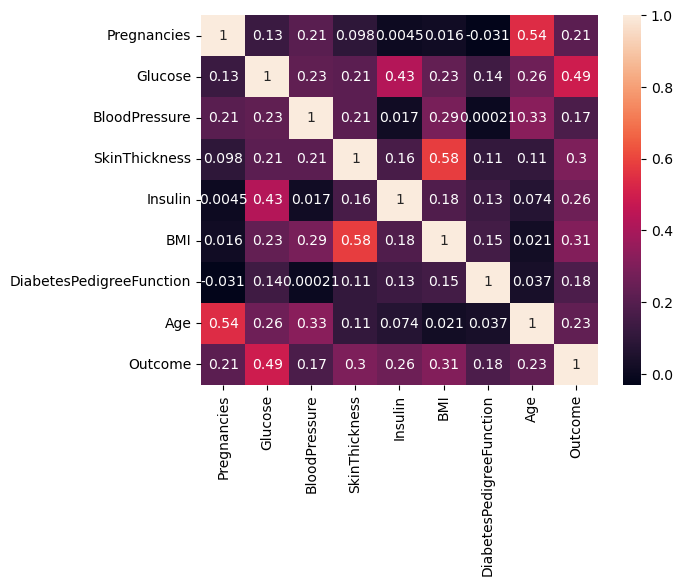

In [87]:
sns.heatmap(new_data.corr(), annot=True)

In [88]:
from sklearn.impute import KNNImputer

In [89]:
data_nan = data.replace({'Glucose': {0:np.nan}, 'BloodPressure': {0:np.nan}, 'SkinThickness': {0:np.nan}, 'BMI': {0:np.nan}, 'Insulin': {0:np.nan}})

In [90]:
data_nan

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [91]:
Imputer = KNNImputer(n_neighbors= 3 )
fd_filled = Imputer.fit_transform(data_nan[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

In [92]:
fd_filled = pd.DataFrame(fd_filled)
fd_filled

,0,1,2,3,4
0,148.0,72.0,35.000000,241.666667,33.6
1,85.0,66.0,29.000000,90.333333,26.6
2,183.0,64.0,30.666667,555.333333,23.3
3,89.0,66.0,23.000000,94.000000,28.1
4,137.0,40.0,35.000000,168.000000,43.1
...,...,...,...,...,...
762,101.0,76.0,48.000000,180.000000,32.9
763,122.0,70.0,27.000000,155.000000,36.8
764,121.0,72.0,23.000000,112.000000,26.2
765,126.0,60.0,18.666667,215.333333,30.1


In [93]:
fd_filled.rename({0:'Glucose', 1:'BloodPressure', 2:'SkinThickness', 3:'Insulin', 4:'BMI'}, axis=1, inplace=True)

In [94]:
fd_filled.insert(0, 'Pregnancies', data['Pregnancies'], True)
fd_filled.insert(6, 'DiabetesPedigreeFunction', data['DiabetesPedigreeFunction'], True)
fd_filled.insert(7, 'Age', data['Age'], True)
fd_filled.insert(8, 'Outcome', data['Outcome'], True)

In [95]:
fd_filled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,241.666667,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,90.333333,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,30.666667,555.333333,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
762,9.0,101.0,76.0,48.000000,180.000000,32.9,0.142,33.0,0.0
763,10.0,122.0,70.0,27.000000,155.000000,36.8,0.171,63.0,0.0
764,2.0,121.0,72.0,23.000000,112.000000,26.2,0.340,27.0,0.0
765,5.0,126.0,60.0,18.666667,215.333333,30.1,0.245,30.0,0.0


In [96]:
fd_filled[fd_filled['SkinThickness']>80]
fd_filled.drop(index=579, axis=0, inplace=True)

<Axes: >

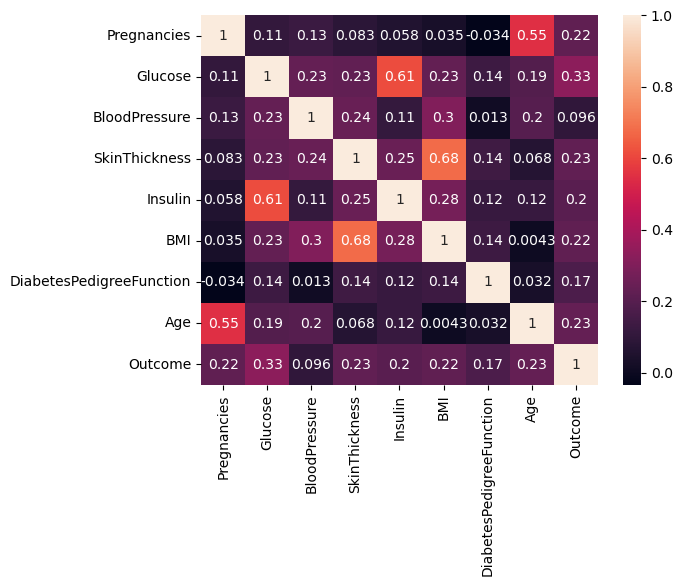

In [97]:
sns.heatmap(fd_filled.corr(), annot=True)

Here we normalize the data by replacing $x$ with $ (x-\mu)/\sigma $ where $\mu$ is the mean of the particular column and $\sigma$ is the standard deviation.

In [98]:
def normalizition(data, col):
    miu = data[col].mean()
    sigma = data[col].std()
    data[col] = (data[col] - miu) / sigma
    return data

In [99]:
df = new_data.copy()
for i in df.columns[:-1]:
    df = normalizition(df, i)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.340574,-0.185523,0.128928,-0.216138,-0.188210,-0.992564,-0.816092,-0.277958,0
1,1.827642,-0.218334,-0.207859,-0.216138,-0.188210,0.413785,-1.019336,-0.363156,0
2,0.043160,-0.382387,1.611124,-0.216138,-0.188210,0.747249,-0.846427,-0.277958,0
3,1.827642,0.569123,0.622993,-0.216138,-0.188210,-0.775087,2.945448,2.022364,0
4,1.232815,-0.743305,0.952370,-0.216138,-0.188210,0.428284,-0.248827,1.425984,0
...,...,...,...,...,...,...,...,...,...
753,1.530228,1.586254,0.128928,0.217309,-1.116463,1.675150,-0.203325,0.829604,1
754,1.827642,-0.677684,0.293617,2.203452,0.613739,0.065823,-0.907097,2.533547,0
755,-0.551667,0.011341,-0.200448,-0.250019,-1.116463,0.631262,-0.394435,-0.533550,0
756,0.340574,-0.021470,-0.035760,-0.717347,-0.039893,-0.905573,-0.682618,-0.277958,0


In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [101]:
X = df.drop('Outcome', axis = 1)
y = df.Outcome
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.340574,-0.185523,0.128928,-0.216138,-0.188210,-0.992564,-0.816092,-0.277958
1,1.827642,-0.218334,-0.207859,-0.216138,-0.188210,0.413785,-1.019336,-0.363156
2,0.043160,-0.382387,1.611124,-0.216138,-0.188210,0.747249,-0.846427,-0.277958
3,1.827642,0.569123,0.622993,-0.216138,-0.188210,-0.775087,2.945448,2.022364
4,1.232815,-0.743305,0.952370,-0.216138,-0.188210,0.428284,-0.248827,1.425984
...,...,...,...,...,...,...,...,...
753,1.530228,1.586254,0.128928,0.217309,-1.116463,1.675150,-0.203325,0.829604
754,1.827642,-0.677684,0.293617,2.203452,0.613739,0.065823,-0.907097,2.533547
755,-0.551667,0.011341,-0.200448,-0.250019,-1.116463,0.631262,-0.394435,-0.533550
756,0.340574,-0.021470,-0.035760,-0.717347,-0.039893,-0.905573,-0.682618,-0.277958


In [102]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state= 25)

In [103]:
k = 5
model = KNeighborsClassifier(k)
model.fit(x_train, y_train.ravel())
y_pred = model.predict(x_test)

In [104]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.756578947368421


In [105]:
k = 3
model = KNeighborsClassifier(k)
model.fit(x_train, y_train.ravel())
y_pred = model.predict(x_test)

In [106]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7697368421052632


In [107]:
k = 20
Acc = np.zeros(k)

for i in range(1, k+1):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train.ravel())
    y_pred = model.predict(x_test)
    Acc[i-1] = metrics.accuracy_score(y_test, y_pred)
Acc

array([0.70394737, 0.69736842, 0.76973684, 0.75      , 0.75657895,
       0.75657895, 0.79605263, 0.75657895, 0.78289474, 0.76315789,
       0.81578947, 0.76315789, 0.78289474, 0.78289474, 0.80921053,
       0.78289474, 0.79605263, 0.77631579, 0.76315789, 0.76315789])

In [108]:
print(f'best K: {Acc.argmax()} \naccuracy: {Acc[Acc.argmax()]}')

best K: 10 
accuracy: 0.8157894736842105


In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [110]:
model_params  = {
    "svm" : {
        "model":SVC(gamma="auto"),
        "params":{
            "C" : [0.1, 0.2, 0.5, 0.8, 1, 1.5],
            "kernel":["rbf","linear","sigmoid"]
        }
    },
    
    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params":{
            "criterion":["entropy","gini"],
            "max_depth":[5,8,9]
        }
    },
    
    "random_forest":{
        "model": RandomForestClassifier(),
        "params":{
            "n_estimators":[1,5,10, 15],
            "max_depth":[5,8,9, 12]
        }
    },
    "naive_bayes":{
        "model": GaussianNB(),
        "params":{}
    },
    
    "logistic_regression" : {
        "model" : LogisticRegression(solver="liblinear",multi_class = "auto"),
        "params": {
            "C" : [0.1, 0.5 , 0.8, 1,5,10]
        }
    }
    
}

In [111]:
score=[]
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=8,return_train_score=False)
    clf.fit(X,y)
    score.append({
        "Model" : model_name,
        "Best_Score": clf.best_score_,
        "Best_Params": clf.best_params_
    })

In [112]:
df_prime = pd.DataFrame(score,columns=["Model","Best_Score","Best_Params"])
df_prime

,Model,Best_Score,Best_Params
0,svm,0.775770,"{'C': 1.5, 'kernel': 'rbf'}"
1,decision_tree,0.809938,"{'criterion': 'entropy', 'max_depth': 5}"
2,random_forest,0.834994,"{'max_depth': 9, 'n_estimators': 15}"
3,naive_bayes,0.752114,{}
4,logistic_regression,0.766601,{'C': 0.1}


In [113]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
cm = confusion_matrix(y_test, y_pred)

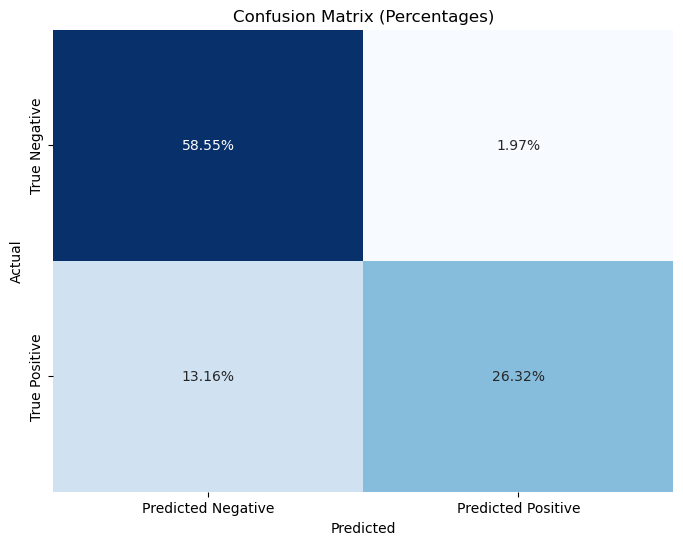

In [116]:
percentage_matrix = (cm / cm.sum().sum())

# Plot the confusion matrix using Seaborn with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(percentage_matrix, annot=True, fmt='.2%', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentages)')
plt.show()

In [117]:
X_Pred = [[0, 80, 100, 20, 120, 40, 1, 31], [1, 160, 100, 45, 170, 40, 1, 33], [5, 150, 130, 55, 170, 50, 1.1, 46]]
X_Pred = pd.DataFrame(X_Pred)

In [118]:
for i in X_Pred.columns[:-1]:
    X_Pred = normalizition(X_Pred, i)

In [119]:
y_pred = rf.predict(X_Pred)
y_pred

array([0, 1, 1], dtype=int64)